## Week4 Assignment

## <font color='blue'>Part-I

## EDA & Data Preprocessing on Google App Store Rating Dataset.

### 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Apps_data.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.shape

(10841, 13)

In [5]:
df.size

140933

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.ndim

2

### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
df.describe(include= 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
df.duplicated().sum()

483

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [12]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
df['Category']=df['Category'].replace('1.9',np.nan)

In [14]:
df.dropna(subset='Category',inplace = True)

In [15]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
print('Total number of null values in the column Rating:',df['Rating'].isnull().sum())

Total number of null values in the column Rating: 1465


In [18]:
df.dropna(subset='Rating',inplace=True)

In [19]:
print('After drop Total number of null values in the column Rating :',df['Rating'].isnull().sum())

After drop Total number of null values in the column Rating : 0


In [20]:
df['Rating_category']=df['Rating']

In [21]:
df['Rating_category'] = np.where(df['Rating_category']>3.5,'high','low')

In [22]:
df['Rating_category']

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [23]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

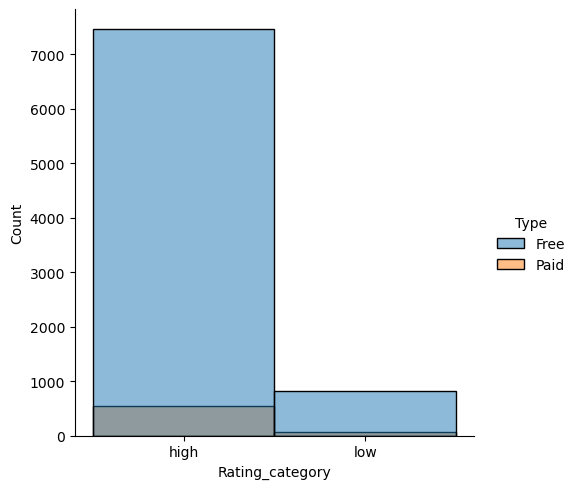

In [24]:
sns.displot(x = df['Rating_category'],hue = df['Type'])
plt.show()

### <font color='green'>Observation:
- <font size=3>Most Number of ratings which got on Google Play Store is given for free apps.
- <font size=3>From the above plot, we can say that the maximum number of people given above 3.5 rating in Google Play apps.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [25]:
df['Reviews']=df['Reviews'].astype(int)

<Axes: >

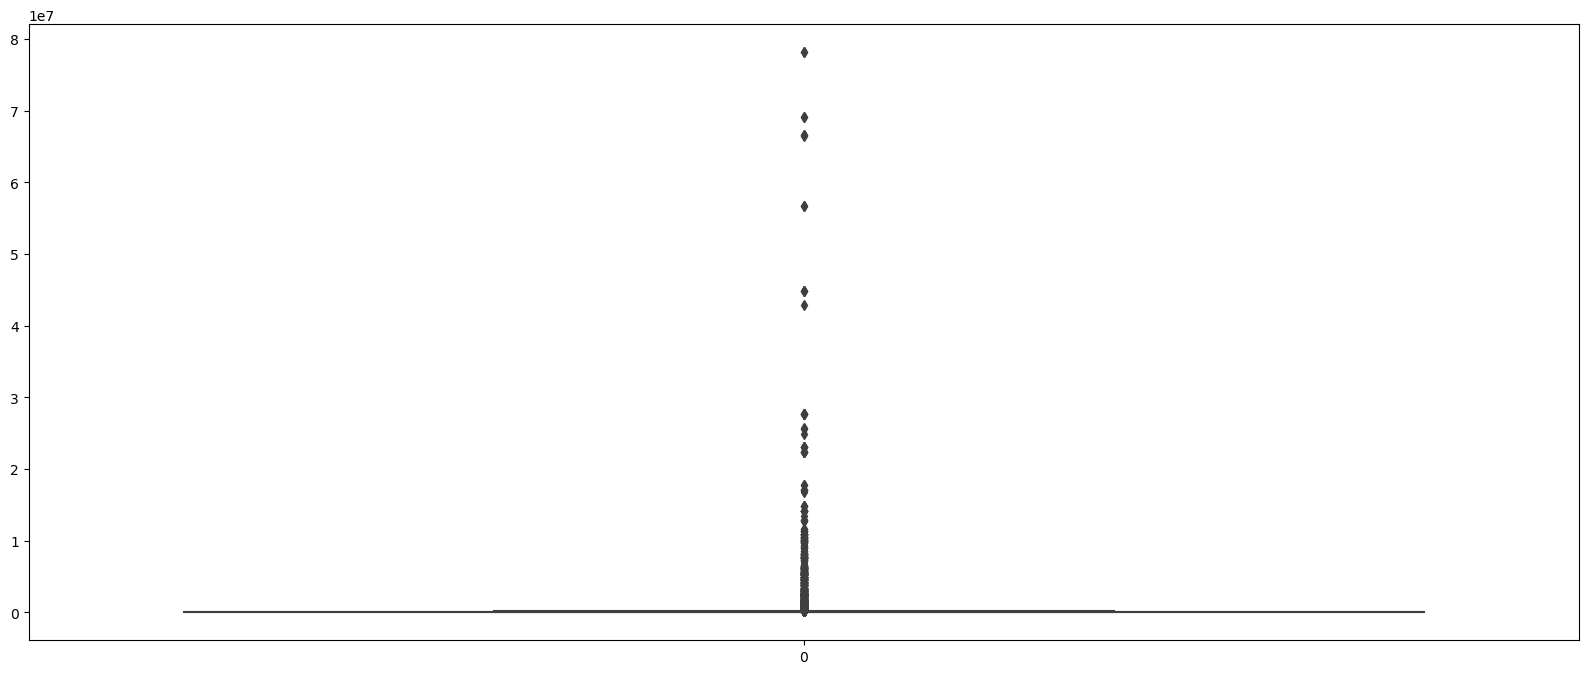

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(df['Reviews'])

In [27]:
df['Reviews']=np.log(df['Reviews'])

In [28]:
df['Reviews']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews, Length: 8892, dtype: float64

<Axes: >

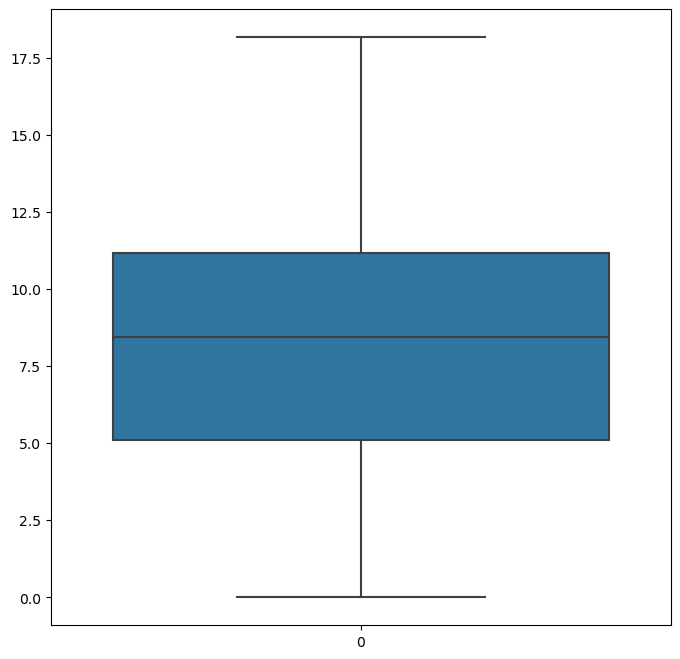

In [29]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Reviews'])

In [30]:
df['Reviews'].describe()

count    8892.000000
mean        8.234893
std         3.880200
min         0.000000
25%         5.099866
50%         8.458398
75%        11.174185
max        18.174247
Name: Reviews, dtype: float64

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [31]:
df['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [32]:
df['Size']=df['Size'].replace({'M':'e6','k':'e3'},regex = True)

In [33]:
df['Size']=df['Size'].replace('Varies with device',np.nan)

In [34]:
df['Size']=df['Size'].astype(float)

In [35]:
df.dropna(subset='Size',inplace = True)

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [36]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [37]:
df['Installs'].value_counts()

1,000,000+        1230
100,000+          1003
10,000+            949
10,000,000+        762
1,000+             675
5,000,000+         493
500,000+           471
50,000+            432
5,000+             414
100+               297
500+               195
100,000,000+       192
50,000,000+        144
10+                 67
50+                 56
500,000,000+        24
5+                   9
1,000,000,000+       8
1+                   3
Name: Installs, dtype: int64

In [38]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [39]:
df['Installs']=df['Installs'].str.replace('+','')

In [40]:
df['Installs']=df['Installs'].str.replace(',','').astype(int)

In [41]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [42]:
df['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [43]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [44]:
df['Price'].value_counts()

0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [45]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high


In [46]:
df.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],inplace=True,axis = 1)

In [47]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,high


### 13. Encode the categorical columns.

In [48]:
le = LabelEncoder()

In [49]:
columns = ['Category','Type','Content Rating','Rating_category']
for col in columns:
    df[col]=le.fit_transform(df[col])

In [50]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,19000000.0,10000,0,0.0,1,0
1,0,6.874198,14000000.0,500000,0,0.0,1,0
2,0,11.379508,8700000.0,5000000,0,0.0,1,0
3,0,12.281384,25000000.0,50000000,0,0.0,4,0
4,0,6.874198,2800000.0,100000,0,0.0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [51]:
X = df.drop('Rating_category',axis=1)
y = df[['Rating_category']]

In [52]:
X.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,5.068904,19000000.0,10000,0,0.0,1
1,0,6.874198,14000000.0,500000,0,0.0,1
2,0,11.379508,8700000.0,5000000,0,0.0,1
3,0,12.281384,25000000.0,50000000,0,0.0,4
4,0,6.874198,2800000.0,100000,0,0.0,1


In [53]:
y.head()

,Rating_category
0,0
1,0
2,0
3,0
4,0


### 15. Split the dataset into train and test.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state = 1)

In [56]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2900000.0,100,0,0.00,1
1298,15,12.120852,57000000.0,5000000,0,0.00,1
6599,20,5.733341,5900000.0,10000,0,0.00,1
7328,30,5.361292,6100000.0,5000,1,3.99,1
5681,18,4.043051,5800000.0,10000,0,0.00,1


In [57]:
X_test.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
5708,29,6.552508,7300000.0,100000,0,0.00,1
7215,11,5.894403,14000000.0,1000,1,2.99,2
1350,15,11.174217,49000000.0,1000000,0,0.00,1
5727,29,11.272496,6300000.0,1000000,0,0.00,1
5326,11,9.205529,3700000.0,100000,0,0.00,4


In [58]:
y_train.head()

,Rating_category
8888,0
1298,0
6599,0
7328,0
5681,0


In [59]:
y_test.head()

,Rating_category
5708,0
7215,0
1350,0
5727,0
5326,0


### 16. Standardize the data, so that the values are within a particular range.

In [60]:
scaler=StandardScaler()

In [61]:
df=scaler.fit_transform(df)

In [62]:
df

array([[-2.03766618, -0.67995305, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.37330014, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.59947486, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29100439, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.81711468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [63]:
df=pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.159928,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.373300,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.599475,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.096119,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.851254,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.944327,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.859789,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.291004,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.817115,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


## <font color='blue'> PART II:

## Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.

### <font color='green'>Domain: Food and agriculture

### 1. Import required libraries and read the dataset.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
food= pd.read_csv('honeyproduction.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [66]:
food.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [67]:
food.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [68]:
food.shape

(626, 8)

In [69]:
food.size

5008

In [70]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


### 3. Display the percentage distribution of the data in each year using the pie chart.

In [71]:
years=food['year'].value_counts()
years

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

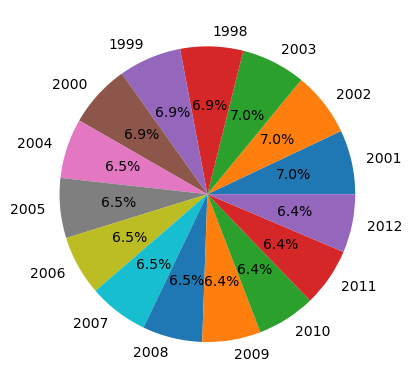

In [72]:
plt.pie(years.values,labels=years.index,autopct='%1.1f%%')
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

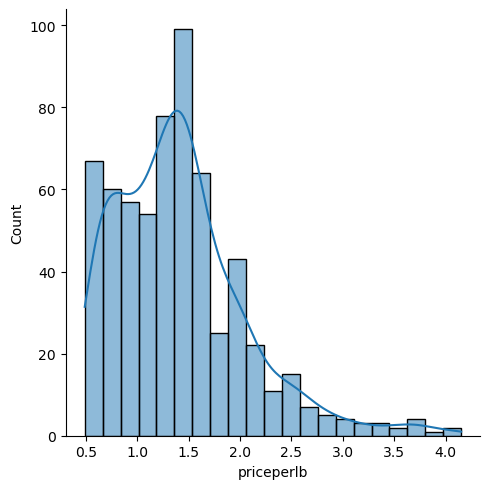

In [73]:
sns.displot(food['priceperlb'],kde = True)
plt.show()

##### <font color='green'>Observation:
- <font size=3>0.5 to 2.0 are most average price per pound based on expanded sales.
- <font size=3>2.0 to 4.0 are less average price per pound based on expanded sales.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

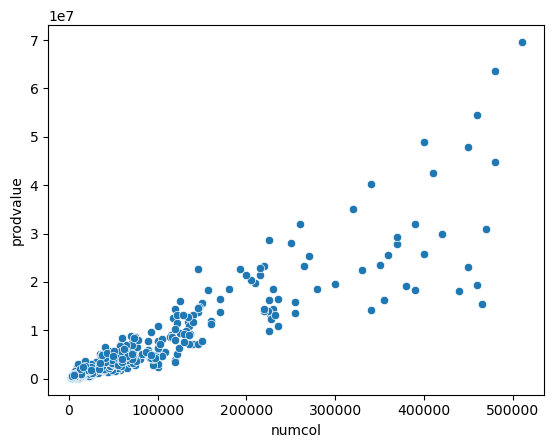

In [74]:
sns.scatterplot(x = 'numcol',y = 'prodvalue',data = food)
plt.show()

### <font color='green'>Observation:
- <font size=3>Numcol & prodvalue are strong positive corration.
- <font size=3>Number of honey producing colonies are increases,Value of production are also increases.
- <font size=3>some outliers in the plot, indicating instances where a relatively small number of colonies generated a high production value.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

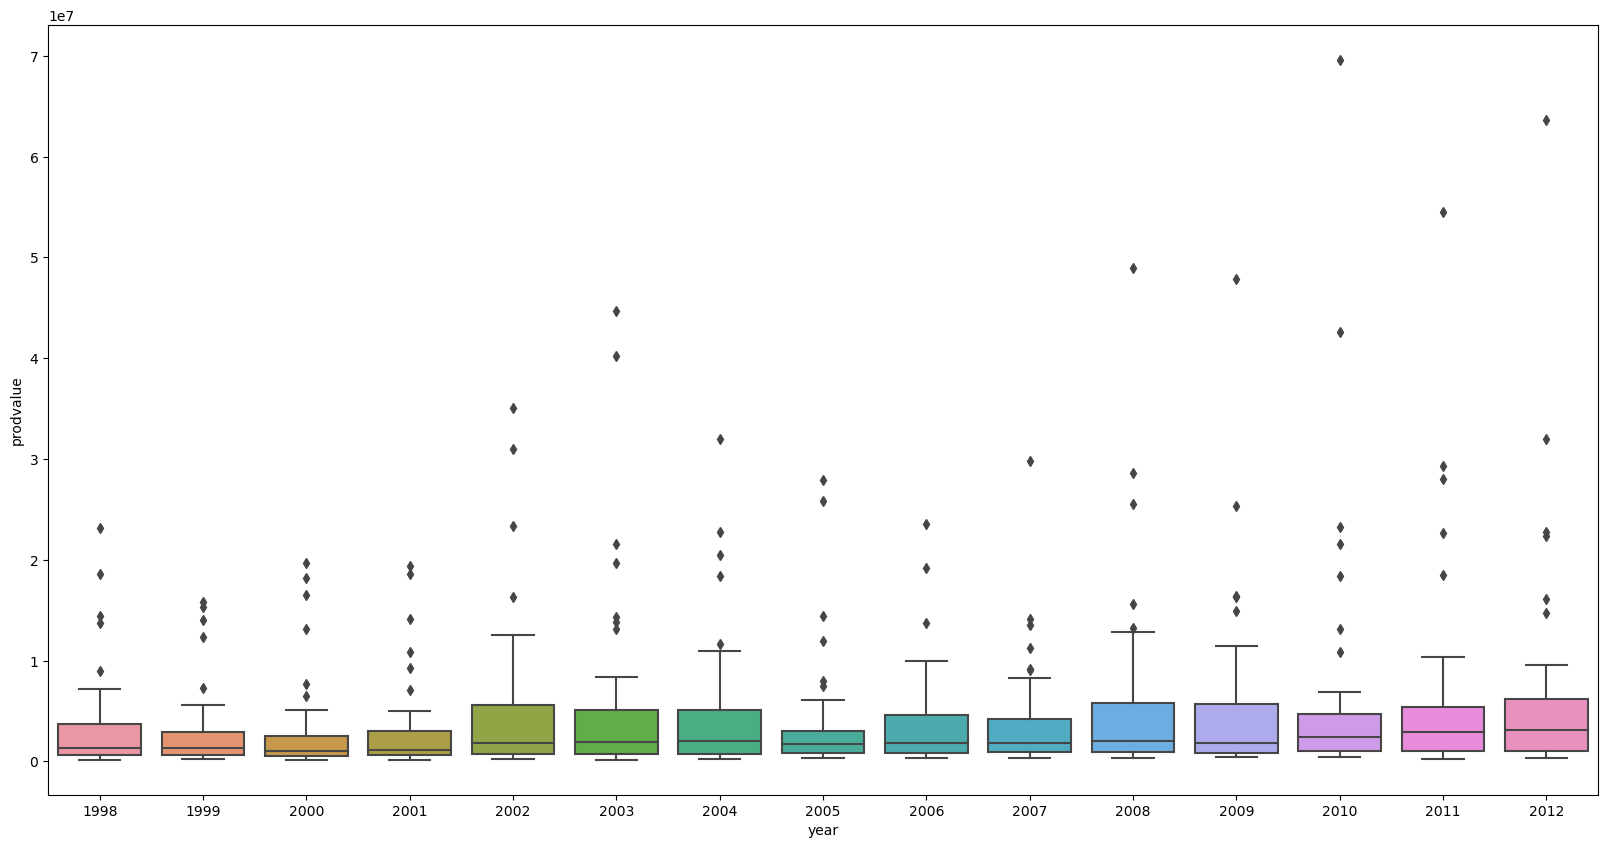

In [75]:
plt.figure(figsize=(20,10))
sns.boxplot(y = food['prodvalue'],x=food['year'])
plt.show()

### <font color='green'>Observation:
- <font size=3> 2010,2011, and 2012 years are Most of the outliers of production values
- <font size=3> If the medians or the boxes show a consistent upward or downward trend over the years, it suggests a general trend in production value over time. An increasing trend would indicate growth, while a decreasing trend might indicate a decline.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

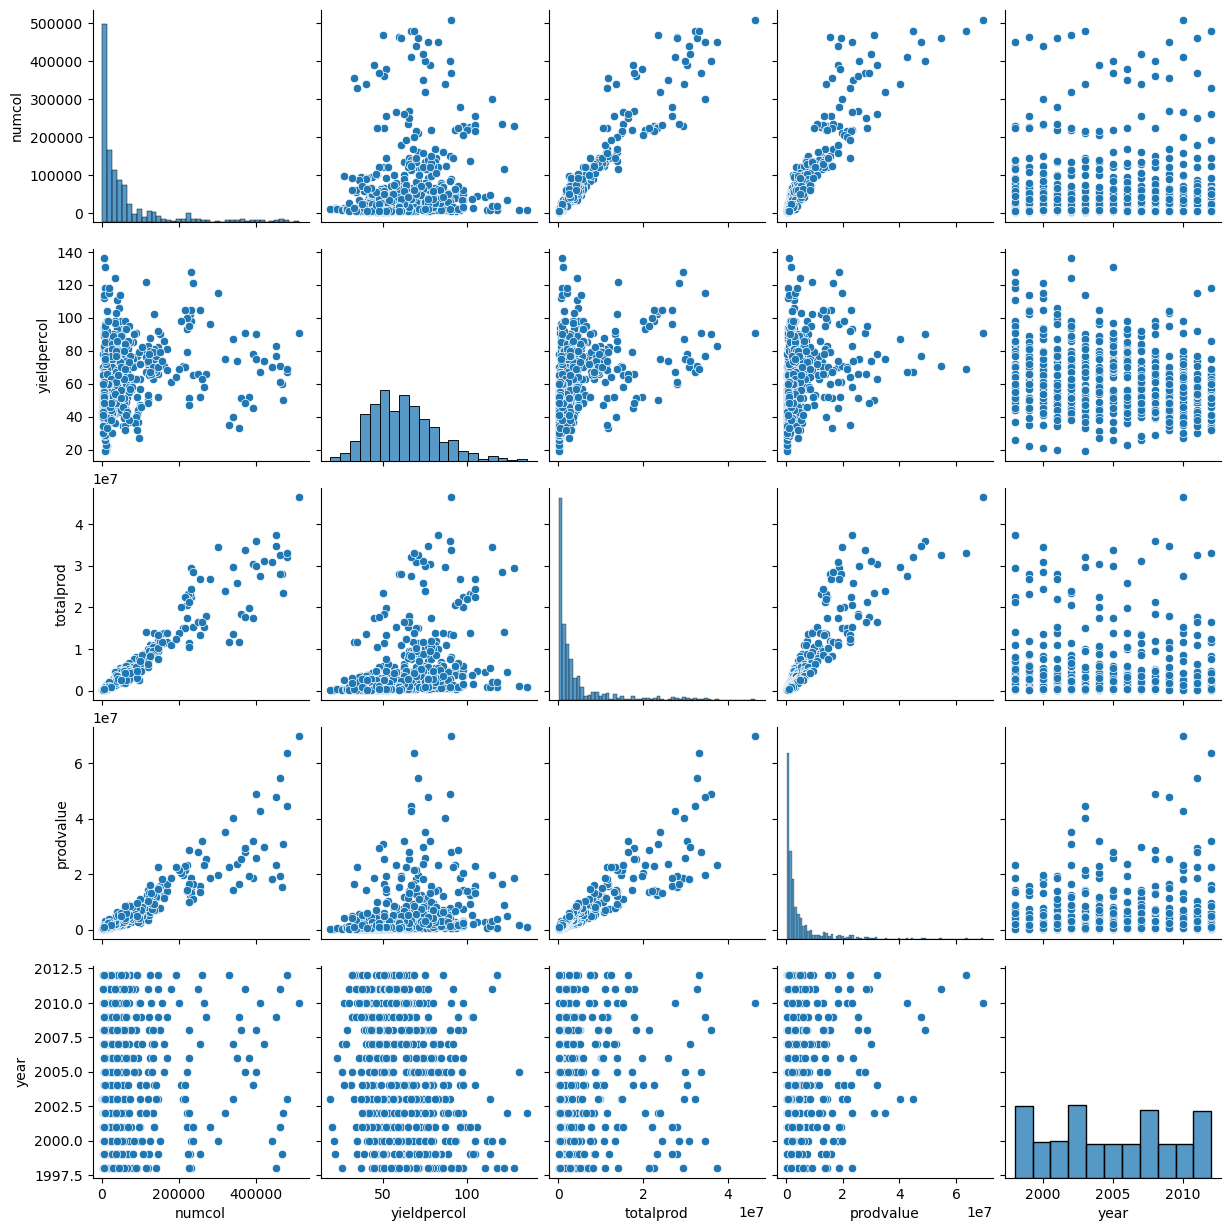

In [76]:
sns.pairplot(food[[ 'numcol', 'yieldpercol', 'totalprod', 'prodvalue','year']])
plt.show()

### <font color='green'>Observation:
- <font size=3> numcol is most corelated to totalprod and prodvalue with no corelated with yeidpercol.
- <font size=3> There is a weak positive correlation between production value (prodvalue) and the year. Production value has shown a slight increase over the years.
- <font size=3> There is a strong positive correlation between total production (totalprod) and production value (prodvalue). This indicates that higher total production is strongly associated with higher production value.

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','total prod', 'stocks', 'price per lb', 'prodvalue')

In [77]:
food.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

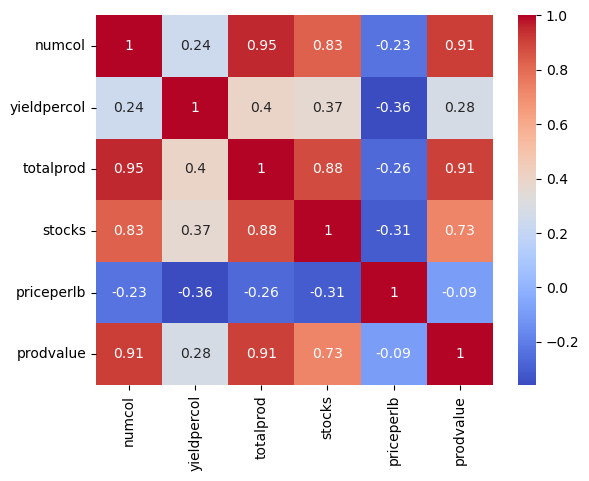

In [78]:
sns.heatmap(food[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb','prodvalue']].corr(),annot = True,cmap='coolwarm')
plt.show()

### <font color='green'>Observation:
- <font size=3> There is a weak positive correlation between production value (prodvalue) and the year. Production value has shown a slight increase over the years.
- <font size=3>There is a strong positive correlation between stocks and production value. Higher stock levels are closely related to higher production values.
- <font size=3>There is a moderate negative correlation between yield per colony (yieldpercol) and the price per pound (priceperlb). As yield per colony increases, the price per pound tends to decrease.